In [ ]:
#pip uninstall -y qiskit qiskit-aer qiskit-terra qiskit-ibmq-provider qiskit-machine-learning qiskit-finance qiskit-optimization qiskit-nature
#pip uninstall -y qiskit qiskit-aer qiskit-terra
pip install qiskit==0.45.0

In [ ]:
pip install qiskit-aer==0.12.2


In [8]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit import Aer
from qiskit.visualization import plot_histogram, circuit_drawer

In [9]:
import qiskit
print(qiskit.__file__)


C:\Users\rajas\anaconda3\envs\cleanml\lib\site-packages\qiskit\__init__.py


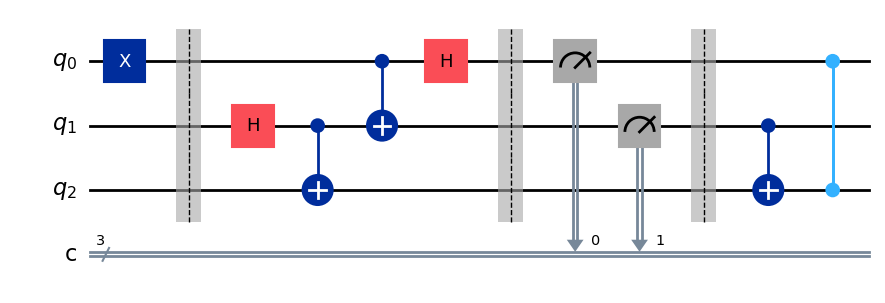

In [10]:
#Setup (Three Qubits) Q0: alice message Q1: Entangle Q2: bob entangle
circuit = QuantumCircuit(3,3)
#This flips Q₀ from |0⟩ to |1⟩.
circuit.x([0])

#Create the Entangled Pair (Q₁ and Q₂) H gate and CNOT gate
circuit.barrier(range(3))
circuit.h([1])
circuit.cx(1,2)

#APPlly cnot and hadamer gate 
circuit.cx(0,1)
circuit.h([0])
circuit.barrier(range(3))
#receiver gets two classical bits (00, 01, 10, or 11).
circuit.measure(range(2),range(2))
circuit.barrier(range(3))
#receiver decodes oo-> nothing, 01->apply pauli x gate 10->pauly z , 11->both
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()
circuit_drawer(circuit, output="mpl", style="iqp")

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="qiskit_ibm_provider")

In [12]:
backend = Aer.get_backend('aer_simulator')
output = transpile(circuit,backend)
output = backend.run(output,shots= 100).result()
a = output.get_counts()

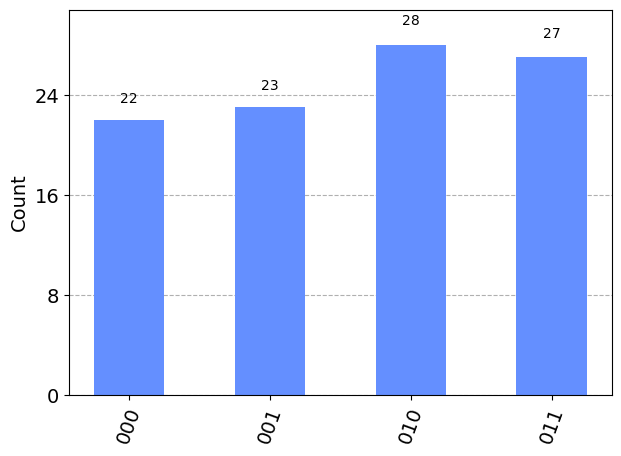

In [13]:
plot_histogram(a)